# Part 2: Training and testing a neural network

In the last tutorial, we learned a couple different things: 
- We learned a lot of python!
- We learned how to get data from MNIST
- We learned what *tensors* are and that we'll need them when doing machine learning.
- We learned that we will need a *test set* and a *training set* to teach our neural network and evaluate its performance.


We'll take a break from PyTorch and make our own - super simple - neural network with Python. This will help us understand what's going on behind the scenes of PyTorch, which is more sophisticated than what we can do. We'll use words that you've seen before, as well as some new ones. If you don't quite understand something, you can google it or peek at the next tutorial to see! 


---

In this tutorial, we'll make a neural network that looks at 1-dimensional tensors. It will give us the number $1$ if there are nonzero numbers in each column, and a $0$ if there is a zero in any of the columns. 

In [1]:
# Numpy is so useful!
import numpy as np

Let's start by making some *training data*. This data is just like the images from MNIST, except we will make it ourselves. For our neural network, we want to keep it super simple. In the cell below, we'll make four different data points. 

In [2]:
train1 = [1,1,3]
train2 = [2,2,1]
train3 = [0,1,2]
train4 = [1,0,2]

We'll also need truth values (also known as *labels* or we can call it an *answer key*!). You'll notice that our 1-dimensional `labels` tensor is four columns wide. The first column entry is the *answer* to the `train1` variable. The second is the *answer* to the `train2` variable, etc. 

This makes sense: since our goal is to "teach" this NN that if a `train` variable has numbers in each column, the *answer* is 1. Do our labels match each of our training data?

In [3]:
labels = [1, 1, 0, 0]

Now, it's time to make our "testing data." We'll call it `test1`. In this tutorial, we'll only test our neural network once! But in real applications, testing datasets can be huge. Make a note of what you expect the output to be.

In [4]:
test1 = [2,2,2]

Time to start - we'll organize the training sets to make the math operations easier later. (Try printing the shape of `training_set_inputs` - we've turned it into a 2-dimensional tensor!)

In [5]:
training_set_inputs = np.array([train1, train2, train3, train4])
training_set_outputs = np.array([labels]).T

Now, we'll need to think about how a neural network "learns." We'll give the neural network three *neurons* to work with. Each one will correspond to a column in the training data.

When we train the neural network, we'll be multiplying these weights with the inputs - when we multiply something with zero we get zero. So, instead of giving the NN empty neurons, or neurons with zeros inside, we'll put small, random numbers inside. 


In [6]:
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.59816118],
       [-0.96009637],
       [-0.68400053]])

Our *activation function* is an important part of machine learning. When we go back to PyTorch, we'll use a rectifier activation function - you can look up these details yourself (i.e., the different functions may be too complicated to explore in this series of tutorials)! Here, we'll use an easier one that looks like this:

$$f = \frac{1}{1 + e^{(-\sum( \text{inputs} * \text{weights}))}}$$


Remember that $\sum$, or capital sigma, means the sum of the values following it. NumPy's `dot` function does this for us - it'll multiply the inputs and weights and sum them for us. (The activation function's coded below for you.) 

We'll also minimize the difference of the activation function (evaluated on all the inputs) and their truth value. 

$$\text{minimize} = \frac{d}{dx}[\sum^{n=1}_{4}(f(\text{inputs}) -y)^{2}]$$

This is called forward propagation - when these values get as small as possible, the neuron is trained. 

In [7]:
def activation_function(inputs, weights):
    # sigmoid function
    return 1 / (1 + np.exp(-(np.dot(inputs, weights))))


# minimize difference between predicted value and truth value
def forwardpropagation(training_set_inputs, training_set_outputs, output):
    # training set inputs * (f(x) - y) * gradient of the activation function
    return np.dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

If the activation function gives you a value with a large magnitude, then it's "confident" one way or another that the neuron has low error. 

Try using the visualizer below to see this. Make `sum_of_neuron_inputs_and_weights` extreme. If `sum_of_neuron_inputs_and_weights` is large and positive, the activation function grows quickly. If `sum_of_neuron_inputs_and_weights` is a large, negative number (like -1000), it decreases quickly.

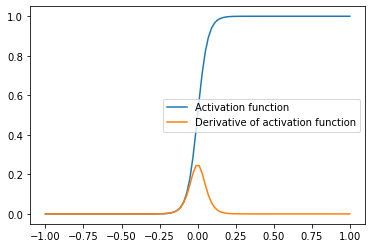

In [8]:
import matplotlib.pyplot as plt

sum_of_neuron_inputs_and_weights = 30

x = np.linspace(-1,1,100)
output = activation_function(x, sum_of_neuron_inputs_and_weights)

plt.plot(x, output, label = "Activation function")
plt.plot(x, output * (1 - output), label = "Derivative of activation function")
plt.legend()
plt.show()

Now, we don't want the NN to "forget" this new weight and we want it to improve instead. Notice what happens with the orange line - the *derivative* of the activation function. If `sum_of_neuron_inputs_and_weights` is small, then the orange line looks closer to the blue line. If `sum_of_neuron_inputs_and_weights` is large, it's far away. 

We'll evaluate the derivative of the activation function and add/subtract that from the current weights belonging to each neuron. This way, if the neuron already has low error, subtracting a small bias from the weights won't change much. If the neuron has a high error, subtracting a larger bias from the weight can improve the NN's performance as it continues to train.

---
Whew! It's actually time to start training the NN now. In each iteration, or epoch, we'll hand our entire training dataset off to the activation function. That activation function will calculate a value to hand to each neuron. The `weights` will add or subtract a value from each neuron - small if it already looks good, and large if it doesn't look good.

Go ahead and play with the epochs to see if you can get worse or better results!

In [9]:
epochs = 1000
for epoch in range(epochs):
    output = activation_function(training_set_inputs, weights)
    weights += forwardpropagation(training_set_inputs, training_set_outputs, output)
print(weights)

[[ 9.87718376]
 [ 9.87718376]
 [-5.95640489]]


And finally, time to test. Is our neural network right?

In [10]:
test_results = activation_function(np.array(test1), weights)

print(f"Testing data: {test1}\n And our neural network thinks that the answer is {test_results}.")

Testing data: [2, 2, 2]
 And our neural network thinks that the answer is [1.].


Activities: 
- What happens if you put a zero in the third place of the testing data? Why does this happen? (Hint: print the `weights` at the last step and try to see what comes out. Each position corresponds to a neuron, but we can't quite interpret the results as humans without calculating `test_results`).
- Try training the neural network with smaller or larger epochs. How many do you need before it gets close? (note: you will need to restart the kernal each time, otherwise, if you just run that cell then you'll keep training the same NN as before.)
- code `and`, `or`, and `xor` gates to test the NN on! Post the results in slack.


---
Tutorial is adapted from [here.](https://medium.com/technology-invention-and-more/how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1)